<a href="https://colab.research.google.com/github/MelissaSequeira/VITCS-IR-Day/blob/main/nightIISERVIOLATIONPROJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.7/91.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 92.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [ ]:


from roboflow import Roboflow
rf = Roboflow(api_key="ZNwDm3DZ6wK7hF39FqW1")
project = rf.workspace("hello-znkqp").project("violation-detection-v9ira")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to violation-detection-1 in yolov8:: 100%|██████████| 2468/2468 [00:00<00:00, 10152.22it/s]


In [ ]:
!cat {dataset.location}/data.yaml


names:
- helmet
- motorcycle
- rider
nc: 3
roboflow:
  license: CC BY 4.0
  project: violation-detection-v9ira
  url: https://universe.roboflow.com/hello-znkqp/violation-detection-v9ira/dataset/1
  version: 1
  workspace: hello-znkqp
test: ../test/images
train: ../train/images
val: ../valid/images


In [ ]:
print(dataset.location)


/content/violation-detection-1


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.1 MB/s eta 0:00:00


In [ ]:
import os

image_folder = "/content/violation-detection-1/train/images"   # change path if needed

total_images = len(os.listdir(image_folder))
print("Total images:", total_images)


Total images: 1074


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # small & fast (recommended first)



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model.train(
    data="/content/violation-detection-1/data.yaml",
    epochs=100,
    imgsz=640,
    batch=16,
    device=0,
    workers=8,
    patience=0,
    optimizer="AdamW",
    project="violation_runs",
    name="yolov8_100ep"
)


Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/violation-detection-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolov8_100ep, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=0, perspective=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ff320fd96a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

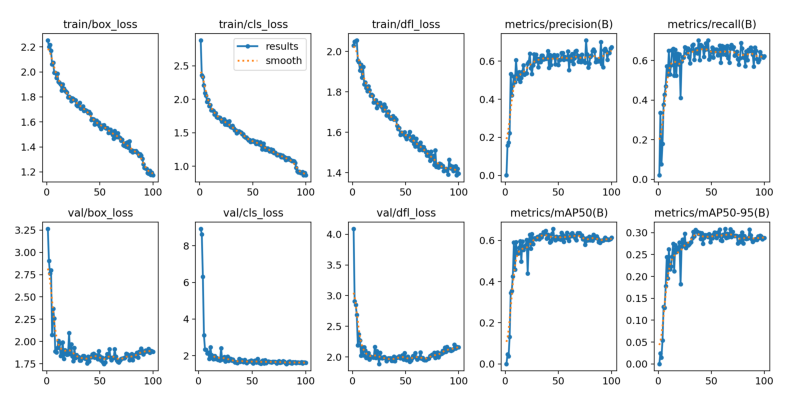

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("violation_runs/yolov8_100ep/results.png")

plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
# Run validation
metrics = model.val()

# Extract metrics
precision = metrics.box.mp      # Mean Precision
recall = metrics.box.mr         # Mean Recall
f1 = metrics.box.f1.mean()      # Mean F1-score
map50 = metrics.box.map50       # mAP@0.5
map50_95 = metrics.box.map      # mAP@0.5:0.95

# Print nicely
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-score: {f1*100:.2f}%")

# Report accuracy like this (standard for YOLO projects)
print(f"Detection Accuracy (mAP@50): {map50*100:.2f}%")


Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 717.7±247.9 MB/s, size: 21.8 KB)
val: Scanning /content/violation-detection-1/valid/labels.cache... 104 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 104/104 54.5Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 2.3it/s 3.0s
                   all        104        290      0.629      0.663      0.636      0.309
                helmet         50         59      0.564      0.458       0.47      0.258
            motorcycle        102        141      0.782      0.788      0.827      0.388
                 rider         68         90       0.54      0.744       0.61      0.282
Speed: 8.0ms preprocess, 6.1ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to /content/runs/detect/val
Preci

True